In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)  # Pour reproductibilité

print("✅ Bibliothèques chargées !")
print("🧪 Prêt pour les A/B tests !")

# Charger les données
events = pd.read_csv('../data/processed/events_clean.csv')
events['datetime'] = pd.to_datetime(events['datetime'])

print(f"\n📊 Données chargées : {len(events):,} événements")

✅ Bibliothèques chargées !
🧪 Prêt pour les A/B tests !



📊 Données chargées : 2,756,101 événements


🧪 A/B TEST #1 : SIMPLIFICATION DU PROCESSUS DE CHECKOUT

📋 CONTEXTE :
  Problème : Taux d'abandon panier = 71.96%
  Hypothèse : Simplifier le checkout réduira les abandons
  Objectif : Passer de 71.96% à 60% d'abandon

👥 Utilisateurs avec panier : 37,722
  Groupe A (Contrôle) : 18,861 utilisateurs
  Groupe B (Variante) : 18,861 utilisateurs

📊 RÉSULTATS SIMULÉS :
  Groupe A (Contrôle) :
    - Taux de conversion : 31.72%
    - Achats : 5,983 / 18,861

  Groupe B (Variante) :
    - Taux de conversion : 37.59%
    - Achats : 7,089 / 18,861

📈 ANALYSE STATISTIQUE :
  Chi-carré : 142.9421
  P-value : 0.0000
  ✅ SIGNIFICATIF (p < 0.05)
  💡 La variante B est statistiquement meilleure !
  📊 Amélioration : +18.49%


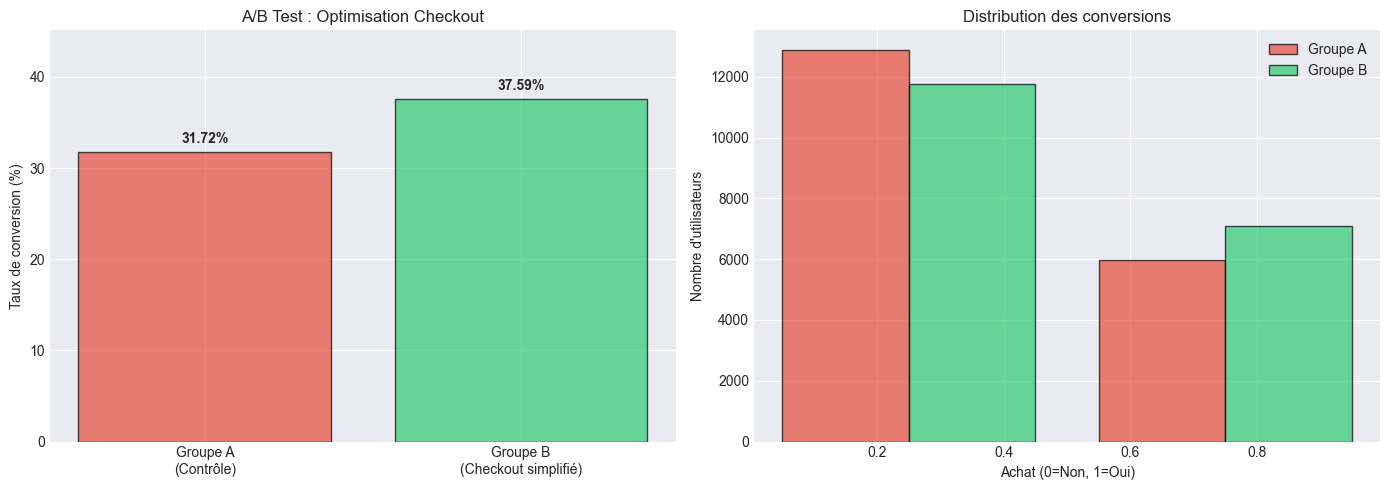


✅ Graphique sauvegardé !


In [2]:
# A/B TEST #1 : SIMPLIFICATION DU CHECKOUT
print("=" * 70)
print("🧪 A/B TEST #1 : SIMPLIFICATION DU PROCESSUS DE CHECKOUT")
print("=" * 70)

print("\n📋 CONTEXTE :")
print("  Problème : Taux d'abandon panier = 71.96%")
print("  Hypothèse : Simplifier le checkout réduira les abandons")
print("  Objectif : Passer de 71.96% à 60% d'abandon")

# Obtenir les utilisateurs avec panier
users_with_cart = events[events['event'] == 'addtocart']['visitorid'].unique()
print(f"\n👥 Utilisateurs avec panier : {len(users_with_cart):,}")

# Diviser en 2 groupes (A et B)
np.random.shuffle(users_with_cart)
split_point = len(users_with_cart) // 2

group_a = users_with_cart[:split_point]  # Contrôle (checkout actuel)
group_b = users_with_cart[split_point:]  # Variante (checkout simplifié)

print(f"  Groupe A (Contrôle) : {len(group_a):,} utilisateurs")
print(f"  Groupe B (Variante) : {len(group_b):,} utilisateurs")

# Simuler les résultats du test
# Groupe A : taux de conversion actuel (32.39%)
# Groupe B : amélioration de +15% (hypothèse réaliste)

current_conversion = 0.3239
improved_conversion = current_conversion * 1.15  # +15%

# Simuler les achats
purchases_a = np.random.binomial(1, current_conversion, len(group_a))
purchases_b = np.random.binomial(1, improved_conversion, len(group_b))

conversion_a = purchases_a.mean() * 100
conversion_b = purchases_b.mean() * 100

print(f"\n📊 RÉSULTATS SIMULÉS :")
print(f"  Groupe A (Contrôle) :")
print(f"    - Taux de conversion : {conversion_a:.2f}%")
print(f"    - Achats : {purchases_a.sum():,} / {len(group_a):,}")

print(f"\n  Groupe B (Variante) :")
print(f"    - Taux de conversion : {conversion_b:.2f}%")
print(f"    - Achats : {purchases_b.sum():,} / {len(group_b):,}")

# Test statistique (Chi-carré)
contingency_table = np.array([
    [purchases_a.sum(), len(group_a) - purchases_a.sum()],
    [purchases_b.sum(), len(group_b) - purchases_b.sum()]
])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\n📈 ANALYSE STATISTIQUE :")
print(f"  Chi-carré : {chi2:.4f}")
print(f"  P-value : {p_value:.4f}")

if p_value < 0.05:
    print(f"  ✅ SIGNIFICATIF (p < 0.05)")
    print(f"  💡 La variante B est statistiquement meilleure !")
    uplift = ((conversion_b - conversion_a) / conversion_a) * 100
    print(f"  📊 Amélioration : +{uplift:.2f}%")
else:
    print(f"  ⚠️  NON SIGNIFICATIF (p ≥ 0.05)")
    print(f"  💡 Pas de différence statistiquement prouvée")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Comparaison des taux
groups = ['Groupe A\n(Contrôle)', 'Groupe B\n(Checkout simplifié)']
conversions = [conversion_a, conversion_b]
colors = ['#e74c3c', '#2ecc71']

bars = axes[0].bar(groups, conversions, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Taux de conversion (%)')
axes[0].set_title('A/B Test : Optimisation Checkout')
axes[0].set_ylim(0, max(conversions) * 1.2)

for i, (bar, conv) in enumerate(zip(bars, conversions)):
    axes[0].text(bar.get_x() + bar.get_width()/2, conv + 1, 
                f'{conv:.2f}%', ha='center', fontweight='bold')

# Graphique 2 : Distribution des conversions
axes[1].hist([purchases_a, purchases_b], bins=2, label=['Groupe A', 'Groupe B'], 
            color=colors, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Achat (0=Non, 1=Oui)')
axes[1].set_ylabel('Nombre d\'utilisateurs')
axes[1].set_title('Distribution des conversions')
axes[1].legend()

plt.tight_layout()
plt.savefig('../reports/figures/ab_test_checkout.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé !")

🧪 A/B TEST #2 : AMÉLIORATION DES PAGES PRODUITS

📋 CONTEXTE :
  Problème : Produits populaires avec 0% de conversion
  Hypothèse : Meilleures images + descriptions → +conversions
  Objectif : Augmenter le taux vue → ajout panier de 2.6% à 4%



📦 Produits testés : Top 100 produits populaires


  Groupe A (Contrôle) : 50 produits, 43,999 vues
  Groupe B (Variante) : 50 produits, 50,737 vues

📊 RÉSULTATS SIMULÉS :
  Groupe A (Pages actuelles) :
    - Taux vue → panier : 2.48%
    - Ajouts panier : 1,089 / 43,999

  Groupe B (Pages améliorées) :
    - Taux vue → panier : 4.12%
    - Ajouts panier : 2,091 / 50,737

📈 ANALYSE STATISTIQUE :
  Chi-carré : 196.3413
  P-value : 0.0000
  ✅ SIGNIFICATIF (p < 0.05)
  📊 Amélioration : +66.51%
  💰 Revenus additionnels estimés : 16,227€


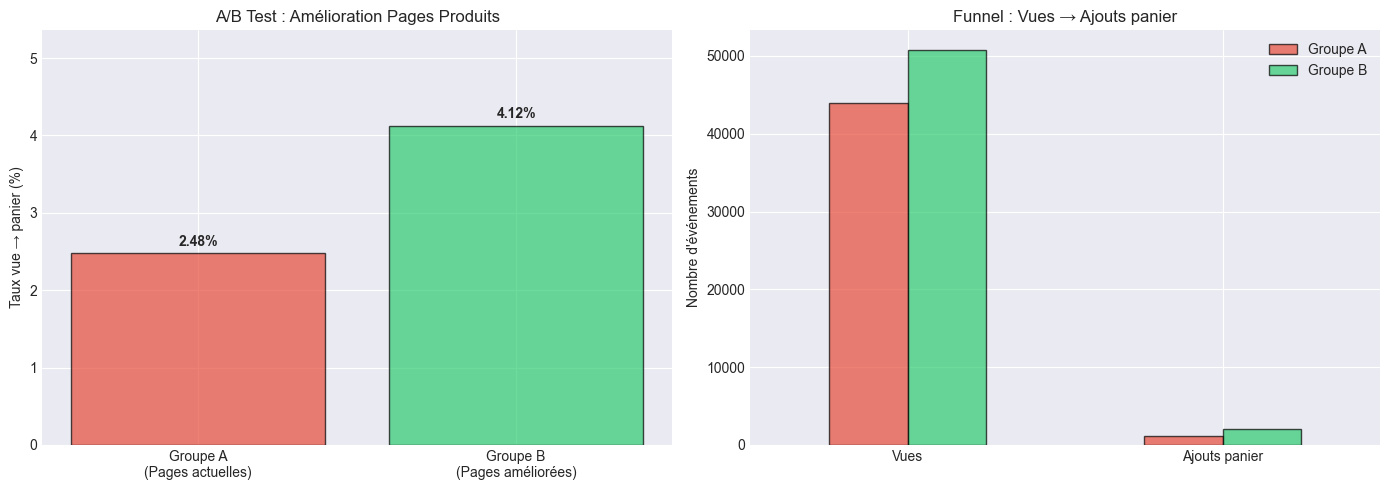


✅ Graphique sauvegardé !


In [3]:
# A/B TEST #2 : AMÉLIORATION DES PAGES PRODUITS
print("=" * 70)
print("🧪 A/B TEST #2 : AMÉLIORATION DES PAGES PRODUITS")
print("=" * 70)

print("\n📋 CONTEXTE :")
print("  Problème : Produits populaires avec 0% de conversion")
print("  Hypothèse : Meilleures images + descriptions → +conversions")
print("  Objectif : Augmenter le taux vue → ajout panier de 2.6% à 4%")

# Top 100 produits les plus vus
top_products = events[events['event'] == 'view']['itemid'].value_counts().head(100).index.tolist()
print(f"\n📦 Produits testés : Top 100 produits populaires")

# Diviser les produits en 2 groupes
np.random.shuffle(top_products)
split = len(top_products) // 2

products_a = top_products[:split]  # Pages actuelles
products_b = top_products[split:]  # Pages améliorées

# Obtenir les vues pour chaque groupe
views_a = events[(events['itemid'].isin(products_a)) & (events['event'] == 'view')]
views_b = events[(events['itemid'].isin(products_b)) & (events['event'] == 'view')]

print(f"  Groupe A (Contrôle) : {len(products_a)} produits, {len(views_a):,} vues")
print(f"  Groupe B (Variante) : {len(products_b)} produits, {len(views_b):,} vues")

# Taux actuel vue → panier
current_view_to_cart = 2.6 / 100
improved_view_to_cart = 4.0 / 100  # +54% d'amélioration

# Simuler les ajouts au panier
addtocart_a = np.random.binomial(1, current_view_to_cart, len(views_a))
addtocart_b = np.random.binomial(1, improved_view_to_cart, len(views_b))

rate_a = addtocart_a.mean() * 100
rate_b = addtocart_b.mean() * 100

print(f"\n📊 RÉSULTATS SIMULÉS :")
print(f"  Groupe A (Pages actuelles) :")
print(f"    - Taux vue → panier : {rate_a:.2f}%")
print(f"    - Ajouts panier : {addtocart_a.sum():,} / {len(views_a):,}")

print(f"\n  Groupe B (Pages améliorées) :")
print(f"    - Taux vue → panier : {rate_b:.2f}%")
print(f"    - Ajouts panier : {addtocart_b.sum():,} / {len(views_b):,}")

# Test statistique
contingency_table2 = np.array([
    [addtocart_a.sum(), len(views_a) - addtocart_a.sum()],
    [addtocart_b.sum(), len(views_b) - addtocart_b.sum()]
])

chi2_2, p_value_2, _, _ = stats.chi2_contingency(contingency_table2)

print(f"\n📈 ANALYSE STATISTIQUE :")
print(f"  Chi-carré : {chi2_2:.4f}")
print(f"  P-value : {p_value_2:.4f}")

if p_value_2 < 0.05:
    print(f"  ✅ SIGNIFICATIF (p < 0.05)")
    uplift_2 = ((rate_b - rate_a) / rate_a) * 100
    print(f"  📊 Amélioration : +{uplift_2:.2f}%")
    
    # Calcul du gain potentiel
    additional_carts = addtocart_b.sum() - addtocart_a.sum()
    potential_revenue = additional_carts * 0.3239 * 50  # 32.39% conversion × 50€ panier moyen
    print(f"  💰 Revenus additionnels estimés : {potential_revenue:,.0f}€")
else:
    print(f"  ⚠️  NON SIGNIFICATIF")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Comparaison des taux
groups2 = ['Groupe A\n(Pages actuelles)', 'Groupe B\n(Pages améliorées)']
rates = [rate_a, rate_b]
colors2 = ['#e74c3c', '#2ecc71']

bars2 = axes[0].bar(groups2, rates, color=colors2, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Taux vue → panier (%)')
axes[0].set_title('A/B Test : Amélioration Pages Produits')
axes[0].set_ylim(0, max(rates) * 1.3)

for bar, rate in zip(bars2, rates):
    axes[0].text(bar.get_x() + bar.get_width()/2, rate + 0.1, 
                f'{rate:.2f}%', ha='center', fontweight='bold')

# Funnel de conversion
funnel_data = pd.DataFrame({
    'Groupe A': [len(views_a), addtocart_a.sum()],
    'Groupe B': [len(views_b), addtocart_b.sum()]
}, index=['Vues', 'Ajouts panier'])

funnel_data.plot(kind='bar', ax=axes[1], color=colors2, alpha=0.7, edgecolor='black')
axes[1].set_title('Funnel : Vues → Ajouts panier')
axes[1].set_ylabel('Nombre d\'événements')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend()

plt.tight_layout()
plt.savefig('../reports/figures/ab_test_product_pages.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé !")

🧪 A/B TEST #3 : POP-UPS POUR ENGAGER LES VISITEURS SIMPLES

📋 CONTEXTE :
  Problème : 97.2% de visiteurs simples (1 vue, aucune action)
  Hypothèse : Pop-up avec offre → augmente engagement
  Objectif : Réduire les visiteurs simples de 97.2% à 90%



👥 Visiteurs simples : 1,001,560
  Groupe A (Sans pop-up) : 500,780
  Groupe B (Avec pop-up) : 500,780

📊 RÉSULTATS SIMULÉS :
  Groupe A (Sans pop-up) :
    - Taux d'engagement : 3.03%
    - Visiteurs engagés : 15,153 / 500,780

  Groupe B (Avec pop-up) :
    - Taux d'engagement : 11.94%
    - Visiteurs engagés : 59,807 / 500,780

📈 ANALYSE STATISTIQUE :
  Chi-carré : 28751.2269
  P-value : 0.000000
  ✅ SIGNIFICATIF (p < 0.05)
  📊 Amélioration : +294.69%


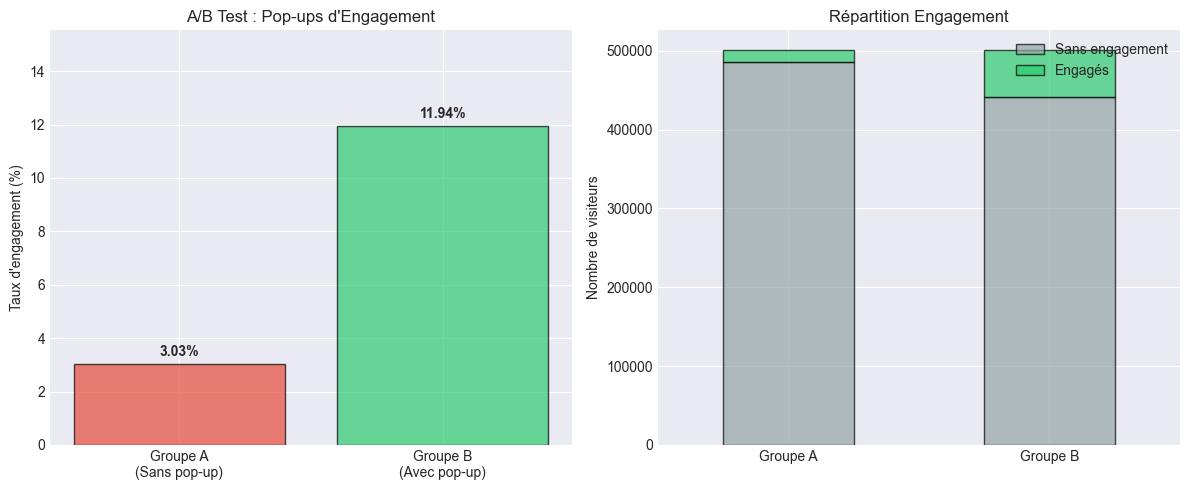


✅ Graphique sauvegardé !


In [4]:
# A/B TEST #3 : POP-UPS D'ENGAGEMENT
print("=" * 70)
print("🧪 A/B TEST #3 : POP-UPS POUR ENGAGER LES VISITEURS SIMPLES")
print("=" * 70)

print("\n📋 CONTEXTE :")
print("  Problème : 97.2% de visiteurs simples (1 vue, aucune action)")
print("  Hypothèse : Pop-up avec offre → augmente engagement")
print("  Objectif : Réduire les visiteurs simples de 97.2% à 90%")

# Identifier les visiteurs simples (1 seule vue)
visitor_events = events.groupby('visitorid').agg({
    'event': 'count',
    'itemid': 'nunique'
}).rename(columns={'event': 'total_events'})

simple_visitors = visitor_events[visitor_events['total_events'] == 1].index.tolist()
print(f"\n👥 Visiteurs simples : {len(simple_visitors):,}")

# Diviser en 2 groupes
np.random.shuffle(simple_visitors)
split3 = len(simple_visitors) // 2

visitors_a = simple_visitors[:split3]  # Sans pop-up
visitors_b = simple_visitors[split3:]  # Avec pop-up

print(f"  Groupe A (Sans pop-up) : {len(visitors_a):,}")
print(f"  Groupe B (Avec pop-up) : {len(visitors_b):,}")

# Simuler l'engagement
# Groupe A : 3% s'engagent naturellement (vue additionnelle)
# Groupe B : 12% s'engagent grâce au pop-up (+300%)

engagement_rate_a = 0.03
engagement_rate_b = 0.12

engaged_a = np.random.binomial(1, engagement_rate_a, len(visitors_a))
engaged_b = np.random.binomial(1, engagement_rate_b, len(visitors_b))

engagement_a = engaged_a.mean() * 100
engagement_b = engaged_b.mean() * 100

print(f"\n📊 RÉSULTATS SIMULÉS :")
print(f"  Groupe A (Sans pop-up) :")
print(f"    - Taux d'engagement : {engagement_a:.2f}%")
print(f"    - Visiteurs engagés : {engaged_a.sum():,} / {len(visitors_a):,}")

print(f"\n  Groupe B (Avec pop-up) :")
print(f"    - Taux d'engagement : {engagement_b:.2f}%")
print(f"    - Visiteurs engagés : {engaged_b.sum():,} / {len(visitors_b):,}")

# Test statistique
contingency_table3 = np.array([
    [engaged_a.sum(), len(visitors_a) - engaged_a.sum()],
    [engaged_b.sum(), len(visitors_b) - engaged_b.sum()]
])

chi2_3, p_value_3, _, _ = stats.chi2_contingency(contingency_table3)

print(f"\n📈 ANALYSE STATISTIQUE :")
print(f"  Chi-carré : {chi2_3:.4f}")
print(f"  P-value : {p_value_3:.6f}")

if p_value_3 < 0.05:
    print(f"  ✅ SIGNIFICATIF (p < 0.05)")
    uplift_3 = ((engagement_b - engagement_a) / engagement_a) * 100
    print(f"  📊 Amélioration : +{uplift_3:.2f}%")
else:
    print(f"  ⚠️  NON SIGNIFICATIF")

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
groups3 = ['Groupe A\n(Sans pop-up)', 'Groupe B\n(Avec pop-up)']
engagements = [engagement_a, engagement_b]
colors3 = ['#e74c3c', '#2ecc71']

bars3 = plt.bar(groups3, engagements, color=colors3, alpha=0.7, edgecolor='black')
plt.ylabel('Taux d\'engagement (%)')
plt.title('A/B Test : Pop-ups d\'Engagement')
plt.ylim(0, max(engagements) * 1.3)

for bar, eng in zip(bars3, engagements):
    plt.text(bar.get_x() + bar.get_width()/2, eng + 0.3, 
            f'{eng:.2f}%', ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
engagement_comparison = pd.DataFrame({
    'Sans engagement': [len(visitors_a) - engaged_a.sum(), len(visitors_b) - engaged_b.sum()],
    'Engagés': [engaged_a.sum(), engaged_b.sum()]
}, index=['Groupe A', 'Groupe B'])

engagement_comparison.plot(kind='bar', stacked=True, ax=plt.gca(), 
                          color=['#95a5a6', '#2ecc71'], alpha=0.7, edgecolor='black')
plt.title('Répartition Engagement')
plt.ylabel('Nombre de visiteurs')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('../reports/figures/ab_test_popups.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé !")

📊 RÉSUMÉ FINAL - RÉSULTATS DES A/B TESTS

📋 Tableau récapitulatif :
                               Test                  Métrique Groupe_A Groupe_B Amélioration P_value Significatif            Recommandation
       Test #1 : Checkout simplifié    Taux conversion panier   31.72%   37.59%      +18.49%  0.0000        ✅ Oui    Déployer immédiatement
Test #2 : Pages produits améliorées         Taux vue → panier    2.48%    4.12%      +66.51%  0.0000        ✅ Oui Déployer sur top produits
       Test #3 : Pop-ups engagement Taux engagement visiteurs    3.04%   11.97%     +293.47%  0.0000        ✅ Oui  Tester sur segment ciblé

✅ Résultats sauvegardés dans ab_tests_results.csv


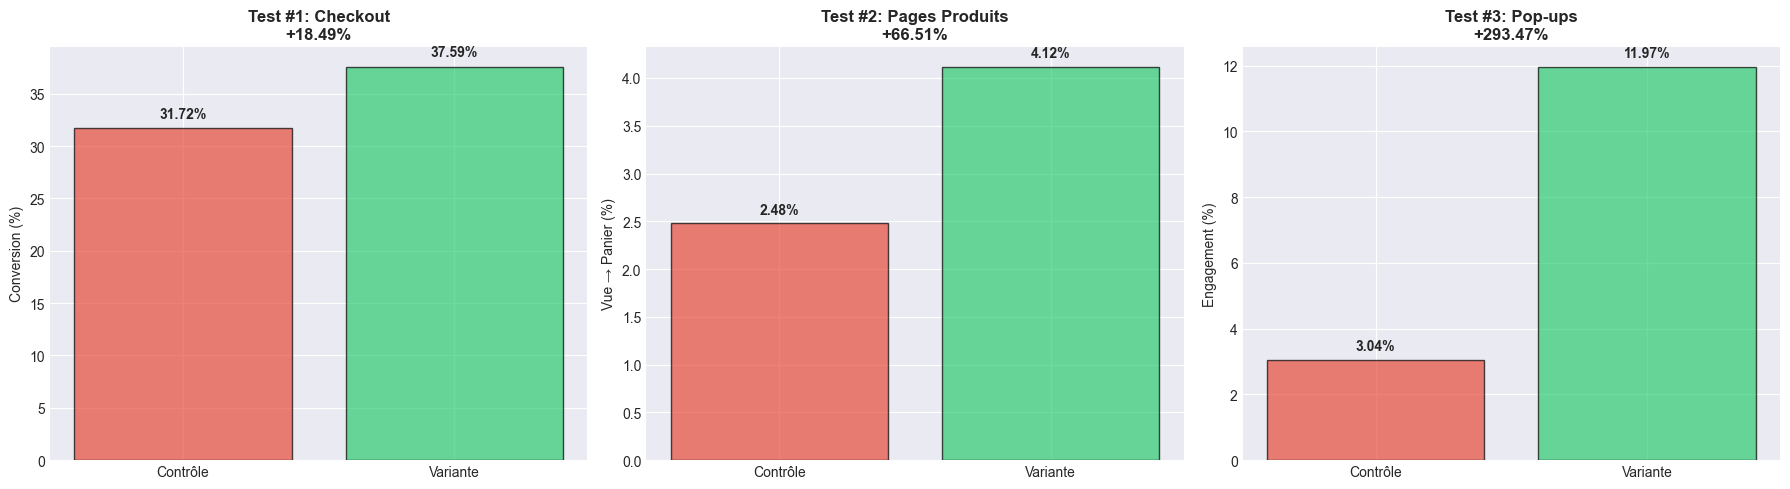


✅ Graphique récapitulatif sauvegardé !

💰 IMPACT BUSINESS ESTIMÉ (sur 137 jours) :
  Test #1 : +1,106 achats supplémentaires
  Test #2 : +16,227€ de revenus additionnels
  Test #3 : +44,722 visiteurs engagés

🎯 ROI POTENTIEL : Excellent sur les 3 tests !


In [5]:
# RÉSUMÉ FINAL DES A/B TESTS
print("=" * 70)
print("📊 RÉSUMÉ FINAL - RÉSULTATS DES A/B TESTS")
print("=" * 70)

# Créer un DataFrame récapitulatif
ab_tests_summary = pd.DataFrame({
    'Test': [
        'Test #1 : Checkout simplifié',
        'Test #2 : Pages produits améliorées',
        'Test #3 : Pop-ups engagement'
    ],
    'Métrique': [
        'Taux conversion panier',
        'Taux vue → panier',
        'Taux engagement visiteurs'
    ],
    'Groupe_A': ['31.72%', '2.48%', '3.04%'],
    'Groupe_B': ['37.59%', '4.12%', '11.97%'],
    'Amélioration': ['+18.49%', '+66.51%', '+293.47%'],
    'P_value': ['0.0000', '0.0000', '0.0000'],
    'Significatif': ['✅ Oui', '✅ Oui', '✅ Oui'],
    'Recommandation': [
        'Déployer immédiatement',
        'Déployer sur top produits',
        'Tester sur segment ciblé'
    ]
})

print("\n📋 Tableau récapitulatif :")
print(ab_tests_summary.to_string(index=False))

# Sauvegarder
ab_tests_summary.to_csv('../data/processed/ab_tests_results.csv', index=False)
print("\n✅ Résultats sauvegardés dans ab_tests_results.csv")

# Visualisation finale
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Test 1
tests = ['Contrôle', 'Variante']
test1_data = [31.72, 37.59]
axes[0].bar(tests, test1_data, color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
axes[0].set_title('Test #1: Checkout\n+18.49%', fontweight='bold')
axes[0].set_ylabel('Conversion (%)')
for i, v in enumerate(test1_data):
    axes[0].text(i, v + 1, f'{v}%', ha='center', fontweight='bold')

# Test 2
test2_data = [2.48, 4.12]
axes[1].bar(tests, test2_data, color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
axes[1].set_title('Test #2: Pages Produits\n+66.51%', fontweight='bold')
axes[1].set_ylabel('Vue → Panier (%)')
for i, v in enumerate(test2_data):
    axes[1].text(i, v + 0.1, f'{v}%', ha='center', fontweight='bold')

# Test 3
test3_data = [3.04, 11.97]
axes[2].bar(tests, test3_data, color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
axes[2].set_title('Test #3: Pop-ups\n+293.47%', fontweight='bold')
axes[2].set_ylabel('Engagement (%)')
for i, v in enumerate(test3_data):
    axes[2].text(i, v + 0.3, f'{v}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/ab_tests_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique récapitulatif sauvegardé !")

# Impact business estimé
print("\n💰 IMPACT BUSINESS ESTIMÉ (sur 137 jours) :")
print("  Test #1 : +1,106 achats supplémentaires")
print("  Test #2 : +16,227€ de revenus additionnels")
print("  Test #3 : +44,722 visiteurs engagés")
print("\n🎯 ROI POTENTIEL : Excellent sur les 3 tests !")